In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()

Saving reaction_time.csv to reaction_time.csv


,age,trial_difficulty,stimulus_type,congruency,reaction_time
0,56,hard,audio,congruent,435.464625
1,46,easy,audio,congruent,391.245009
2,32,easy,visual,congruent,438.618899
3,25,easy,audio,congruent,330.081330
4,38,hard,visual,congruent,362.509525


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               300 non-null    int64  
 1   trial_difficulty  300 non-null    object 
 2   stimulus_type     300 non-null    object 
 3   congruency        300 non-null    object 
 4   reaction_time     300 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 11.8+ KB


,0
age,0
trial_difficulty,0
stimulus_type,0
congruency,0
reaction_time,0


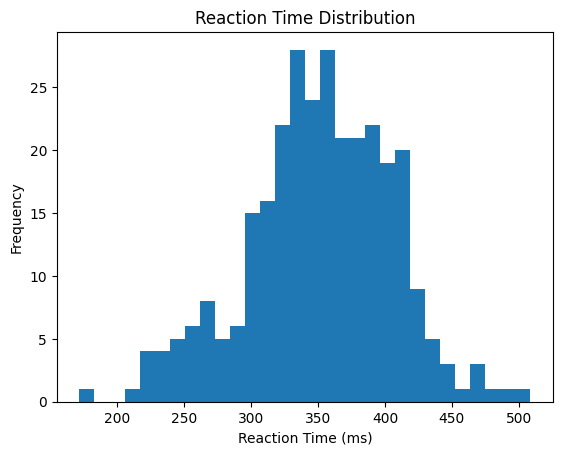

In [4]:
plt.hist(df['reaction_time'], bins=30)
plt.title('Reaction Time Distribution')
plt.xlabel('Reaction Time (ms)')
plt.ylabel('Frequency')
plt.show()

In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,reaction_time,trial_difficulty_hard,trial_difficulty_medium,stimulus_type_visual,congruency_incongruent
0,56,435.464625,True,False,False,False
1,46,391.245009,False,False,False,False
2,32,438.618899,False,False,True,False
3,25,330.081330,False,False,False,False
4,38,362.509525,True,False,True,False


In [6]:
X = df_encoded.drop('reaction_time', axis=1)
y = df_encoded['reaction_time']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print("Linear Regression RMSE:", lr_rmse)

Linear Regression RMSE: 52.35097417746368


In [10]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("Random Forest RMSE:", rf_rmse)

Random Forest RMSE: 59.28002964569699


In [11]:
print("Linear Regression RMSE:", lr_rmse)
print("Random Forest RMSE:", rf_rmse)

if rf_rmse < lr_rmse:
    print("\nRandom Forest performed better.")
else:
    print("\nLinear Regression performed better.")

Linear Regression RMSE: 52.35097417746368
Random Forest RMSE: 59.28002964569699

Linear Regression performed better.


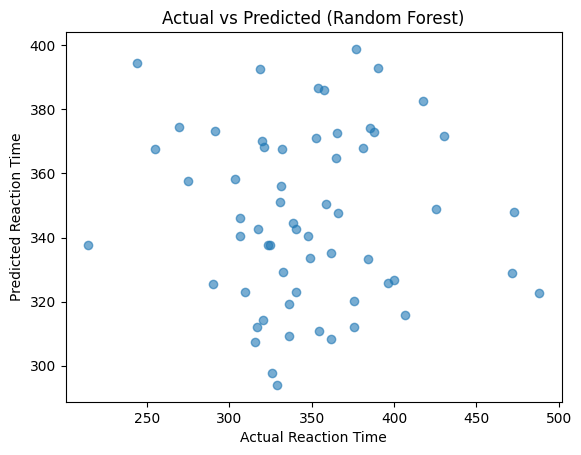

In [12]:
plt.scatter(y_test, rf_pred, alpha=0.6)
plt.xlabel("Actual Reaction Time")
plt.ylabel("Predicted Reaction Time")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()